In [1]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

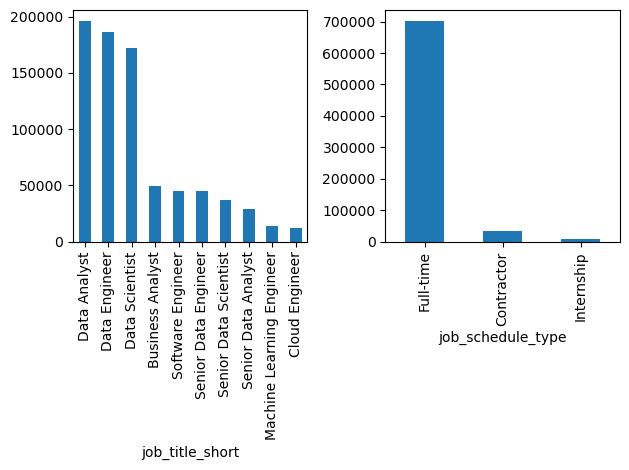

In [13]:
fig, ax = plt.subplots(1,2)

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1])

fig.tight_layout()

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


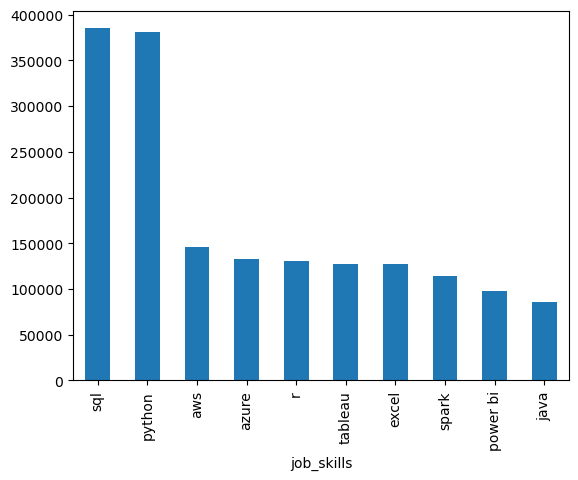

In [16]:
df_exploded = df.explode("job_skills")
df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")
skills_count = df_exploded.groupby(["job_skills", "job_title_short"]).size() #this is a Series
df_skills_count = skills_count.reset_index(name="skill_count") # converting from a Series to a DataFrame
df_skills_count = df_skills_count.sort_values(by="skill_count", ascending=False)

df_skills_count

In [20]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]

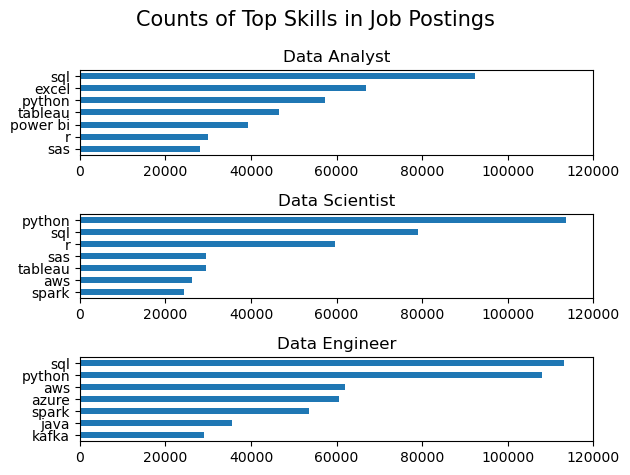

In [44]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(7)
  df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel("")
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0,120000)
  
fig.suptitle("Counts of Top Skills in Job Postings", fontsize= 15)
fig.tight_layout()    